# Stack graphs for simulation output

In [1]:
import os
from collections import namedtuple

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

# List of RGB tuples for SNL/QuESt color palette
PALETTE_HEX = [(0, 83, 118), (132, 189, 0),
    (0, 173, 208), (255, 163, 0), (255, 88, 93), (174, 37, 115)]
PALETTE = []

for color_hex in PALETTE_HEX:
    # Convert to [0, 1] scale for rgb values.
    PALETTE.append(tuple([rgb_val/255 for rgb_val in color_hex]))

# Seaborn/matplotlib plot settings
sns.set()
sns.set_context('paper', font_scale=2.15)
sns.set_palette(PALETTE)

plt.rcParams["figure.figsize"] = (12,6)
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18
        }
mpl.rc('font', **font)

GenerationType = namedtuple('GenerationType',
                            [
                           'label',
                           'color',
                            ]
                           )

GENERATION_TYPES = {
    'Z': GenerationType('Battery', '#42F1F4'),
    'N': GenerationType('Nuclear', '#BE6E46'),
    'E': GenerationType('Geothermal', '#CDE7B0'),
    'B': GenerationType('Biomass', '#A3BFA8'),
    'C': GenerationType('Coal', '#2E5189'),
    'G': GenerationType('Gas', '#98A6BC'),
    'O': GenerationType('Oil', '#F5D547'),
    'H': GenerationType('Hydro', '#58355E'),
    'W': GenerationType('Wind', '#FFFFC7'),
    'S': GenerationType('Solar', '#89FC00'),
}



## Grab some simulator output

In [2]:
# case_prefix = '11_12_18_output_dispatchable'
# case_prefix = '11_26_18_sj_low_renewables_15res'
# case_prefix = '11_21_18_sj_inc_renewables_15res'
#case_prefix = '11_29_18_15res'
# case_prefix = '12_12_18_baseline'
# case_prefix = '12_12_18_scen_2'
#case_prefix = '12_12_18_scen_3'
case_prefix = 'rts-gmlc_deterministic'

RESULTS_DIR = os.path.join('data', case_prefix)


# Set the directory to save figures
FIGS_DIR = os.path.join('report', 'figs')

In [3]:
hourly_gen_summary = pd.read_csv(os.path.join(RESULTS_DIR, 'Hourly_gen_summary.csv'))
thermal_detail = pd.read_csv(os.path.join(RESULTS_DIR, 'thermal_detail.csv'))

In [4]:
RTS_SOURCE_DIR = os.path.join('..', '..', '..', 'RTS-GMLC', 'RTS_DATA', 'SourceData')
gens_table = pd.read_csv(os.path.join(RTS_SOURCE_DIR, 'gen.csv'))

In [5]:
gens_table['Fuel'].unique()

array(['Oil', 'Coal', 'NG', 'Sync_Cond', 'Nuclear', 'Hydro', 'Solar',
       'Wind', 'Storage'], dtype=object)

In [6]:
FUEL_TO_CODE = {
    'Oil': 'O',
    'Coal': 'C',
    'NG': 'G',
    'Nuclear': 'N',
    'Hydro': 'H',
    'Solar': 'S',
    'Wind': 'W',
               }

In [7]:
def _fuel_type_to_code(x):
    code = FUEL_TO_CODE.get(x, '')
    
    return code

In [8]:
gens_table['gen type'] = gens_table['Fuel'].apply(_fuel_type_to_code)

In [9]:
gens_table

,GEN UID,Bus ID,Gen ID,Unit Group,Unit Type,Category,Fuel,MW Inj,MVAR Inj,V Setpoint p.u.,...,Emissions CO Lbs/MMBTU,Emissions VOCs Lbs/MMBTU,Damping Ratio,Inertia MJ/MW,Base MVA,Transformer X p.u.,Unit X p.u.,Pump Load MW,Storage Roundtrip Efficiency,gen type
0,101_CT_1,101,1,U20,CT,Oil CT,Oil,8.0,4.96,1.0468,...,0.11,0.040,0,2.8,24,0.13,0.32,0,0,O
1,101_CT_2,101,2,U20,CT,Oil CT,Oil,8.0,4.96,1.0468,...,0.11,0.040,0,2.8,24,0.13,0.32,0,0,O
2,101_STEAM_3,101,3,U76,STEAM,Coal,Coal,76.0,0.14,1.0468,...,0.02,0.003,0,3.0,89,0.13,0.30,0,0,C
3,101_STEAM_4,101,4,U76,STEAM,Coal,Coal,76.0,0.14,1.0468,...,0.02,0.003,0,3.0,89,0.13,0.30,0,0,C
4,102_CT_1,102,1,U20,CT,Oil CT,Oil,8.0,4.88,1.0467,...,0.11,0.040,0,2.8,24,0.13,0.32,0,0,O
5,102_CT_2,102,2,U20,CT,Oil CT,Oil,8.0,4.88,1.0467,...,0.11,0.040,0,2.8,24,0.13,0.32,0,0,O
6,102_STEAM_3,102,3,U76,STEAM,Coal,Coal,76.0,-2.31,1.0467,...,0.02,0.003,0,3.0,89,0.13,0.30,0,0,C
7,102_STEAM_4,102,4,U76,STEAM,Coal,Coal,76.0,-2.31,1.0467,...,0.02,0.003,0,3.0,89,0.13,0.30,0,0,C
8,107_CC_1,107,1,U355,CC,Gas CC,NG,355.0,49.51,1.0500,...,0.00,0.000,0,5.0,414,0.13,0.30,0,0,G
9,113_CT_1,113,1,U55,CT,Gas CT,NG,55.0,19.00,1.0347,...,0.00,0.000,0,2.8,64,0.13,0.32,0,0,G


In [10]:
gens_table.set_index('GEN UID', inplace=True)
gens_dict = gens_table.to_dict(orient='index')

In [11]:
gens_dict

{'101_CT_1': {'Base MVA': 24,
  'Bus ID': 101,
  'Category': 'Oil CT',
  'Damping Ratio': 0,
  'Emissions CH4 Lbs/MMBTU': 0.002,
  'Emissions CO Lbs/MMBTU': 0.11,
  'Emissions CO2 Lbs/MMBTU': 160,
  'Emissions N2O Lbs/MMBTU': 0.004,
  'Emissions NOX Lbs/MMBTU': '0.5',
  'Emissions Part Lbs/MMBTU': '0.036',
  'Emissions SO2 Lbs/MMBTU': '0.2',
  'Emissions VOCs Lbs/MMBTU': 0.04,
  'FOR': 0.1,
  'Fuel': 'Oil',
  'Fuel Price $/MMBTU': 10.3494,
  'Fuel Sulfur Content %': '0.2',
  'Gen ID': 1,
  'HR_avg_0': 13114.0,
  'HR_incr_1': 9456.0,
  'HR_incr_2': 9476.0,
  'HR_incr_3': 10352.0,
  'HR_incr_4': nan,
  'Inertia MJ/MW': 2.8,
  'MTTF Hr': 450,
  'MTTR Hr': 50,
  'MVAR Inj': 4.96,
  'MW Inj': 8.0,
  'Min Down Time Hr': 1.0,
  'Min Up Time Hr': 1.0,
  'Non Fuel Shutdown Cost $': 0,
  'Non Fuel Start Cost $': 0,
  'Output_pct_0': 0.4,
  'Output_pct_1': 0.6,
  'Output_pct_2': 0.8,
  'Output_pct_3': 1.0,
  'Output_pct_4': nan,
  'PMax MW': 20.0,
  'PMin MW': 8,
  'Pump Load MW': 0,
  'QMax MVAR

In [12]:
thermal_detail['gen type'] = thermal_detail['Generator'].apply(lambda x: gens_dict[x]['gen type'])

In [13]:
thermal_detail

,Date,Dispatch,Dispatch DA,Generator,Headroom,Hour,Unit Cost,Unit Market Revenue,Unit State,Unit Uplift Payment,gen type
0,2020-07-10,0.000000,NaN,101_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
1,2020-07-10,0.000000,NaN,101_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
2,2020-07-10,76.000000,NaN,101_STEAM_3,0.000000,1,1596.5700,NaN,1,NaN,C
3,2020-07-10,76.000000,NaN,101_STEAM_4,0.000000,1,1596.5700,NaN,1,NaN,C
4,2020-07-10,0.000000,NaN,102_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
5,2020-07-10,0.000000,NaN,102_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
6,2020-07-10,45.300000,NaN,102_STEAM_3,30.700000,1,1017.5900,NaN,1,NaN,C
7,2020-07-10,45.300000,NaN,102_STEAM_4,30.700000,1,1017.5900,NaN,1,NaN,C
8,2020-07-10,170.000000,NaN,107_CC_1,185.000000,1,4772.5000,NaN,1,NaN,G
9,2020-07-10,0.000000,NaN,113_CT_1,0.000000,1,0.0000,NaN,0,NaN,G


In [14]:
thermal_detail.loc[thermal_detail['gen type'] == 'C']['Dispatch'].sum()

300054.17561500001

In [15]:
DATE = thermal_detail['Date'].unique()[0]
SAMPLE_DAY = thermal_detail.loc[thermal_detail['Date'] == DATE]

In [16]:
SAMPLE_DAY

,Date,Dispatch,Dispatch DA,Generator,Headroom,Hour,Unit Cost,Unit Market Revenue,Unit State,Unit Uplift Payment,gen type
0,2020-07-10,0.000000,NaN,101_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
1,2020-07-10,0.000000,NaN,101_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
2,2020-07-10,76.000000,NaN,101_STEAM_3,0.000000,1,1596.5700,NaN,1,NaN,C
3,2020-07-10,76.000000,NaN,101_STEAM_4,0.000000,1,1596.5700,NaN,1,NaN,C
4,2020-07-10,0.000000,NaN,102_CT_1,0.000000,1,0.0000,NaN,0,NaN,O
5,2020-07-10,0.000000,NaN,102_CT_2,0.000000,1,0.0000,NaN,0,NaN,O
6,2020-07-10,45.300000,NaN,102_STEAM_3,30.700000,1,1017.5900,NaN,1,NaN,C
7,2020-07-10,45.300000,NaN,102_STEAM_4,30.700000,1,1017.5900,NaN,1,NaN,C
8,2020-07-10,170.000000,NaN,107_CC_1,185.000000,1,4772.5000,NaN,1,NaN,G
9,2020-07-10,0.000000,NaN,113_CT_1,0.000000,1,0.0000,NaN,0,NaN,G


In [17]:
for gen_type in GENERATION_TYPES:
    print(SAMPLE_DAY.loc[(SAMPLE_DAY['gen type'] == gen_type) & (SAMPLE_DAY['Hour'] == 1)])

Empty DataFrame
Columns: [Date, Dispatch, Dispatch DA, Generator, Headroom, Hour, Unit Cost, Unit Market Revenue, Unit State, Unit Uplift Payment, gen type]
Index: []
          Date  Dispatch  Dispatch DA      Generator  Headroom  Hour  \
18  2020-07-10     400.0          NaN  121_NUCLEAR_1       0.0     1   

    Unit Cost  Unit Market Revenue  Unit State  Unit Uplift Payment gen type  
18     3241.4                  NaN           1                  NaN        N  
Empty DataFrame
Columns: [Date, Dispatch, Dispatch DA, Generator, Headroom, Hour, Unit Cost, Unit Market Revenue, Unit State, Unit Uplift Payment, gen type]
Index: []
Empty DataFrame
Columns: [Date, Dispatch, Dispatch DA, Generator, Headroom, Hour, Unit Cost, Unit Market Revenue, Unit State, Unit Uplift Payment, gen type]
Index: []
          Date    Dispatch  Dispatch DA    Generator    Headroom  Hour  \
2   2020-07-10   76.000000          NaN  101_STEAM_3    0.000000     1   
3   2020-07-10   76.000000          NaN  101_STE

In [44]:
def generate_stackedbar_chart(chart_data, bar_width=0.9, title=''):
    """Creates a stacked bar chart using chart_data."""
    fig, ax = plt.subplots(figsize=(16, 6))

    # Determine which colors to use.
    colors_list = PALETTE

    indices = np.arange(24)
    labels = [str(ix) for ix in indices]
    bottom = np.zeros(len(indices))
    
    # Sum the dispatch by gen category for each hour
    def _compute_total_dispatch_per_hour(gen_type):
        dispatch_by_hour = []
        
        for h in chart_data['Hour'].unique():
            total_hour_dispatch = SAMPLE_DAY.loc[(SAMPLE_DAY['gen type'] == gen_type) & (SAMPLE_DAY['Hour'] == h)]['Dispatch'].sum()
            dispatch_by_hour.append(total_hour_dispatch)
        
        return dispatch_by_hour

    ## Compute the activity counts for each activity category.
    for gen_type, gen_type_tuple in GENERATION_TYPES.items():
        component_color = gen_type_tuple.color
        vals = _compute_total_dispatch_per_hour(gen_type)
        
        # Plot set of bar stack component.
        ax.bar(indices, vals, bar_width, bottom=bottom, color=component_color, label=gen_type_tuple.label)

        # Update "bottom" position for each stack. 
        bottom += vals

    plt.xticks(indices, labels, rotation=0)
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine(offset=10, trim=True)

    # Put legend outside on the right.
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(title)
    ax.set_ylabel('Power [MW]')
    ax.yaxis.grid(True)

    return fig, ax

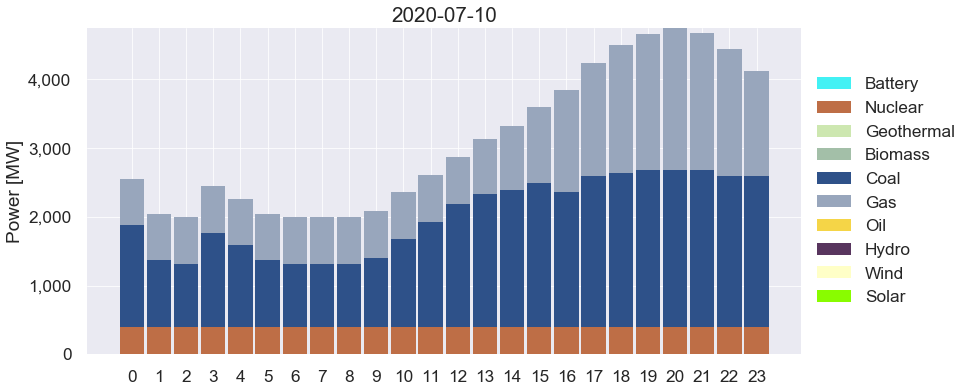

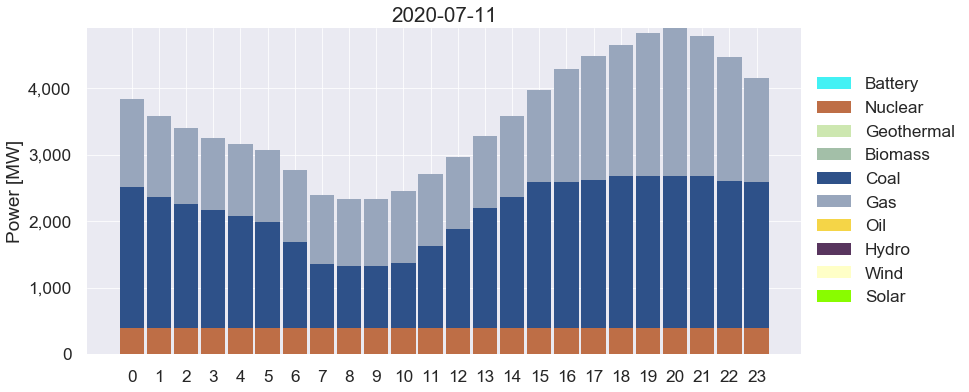

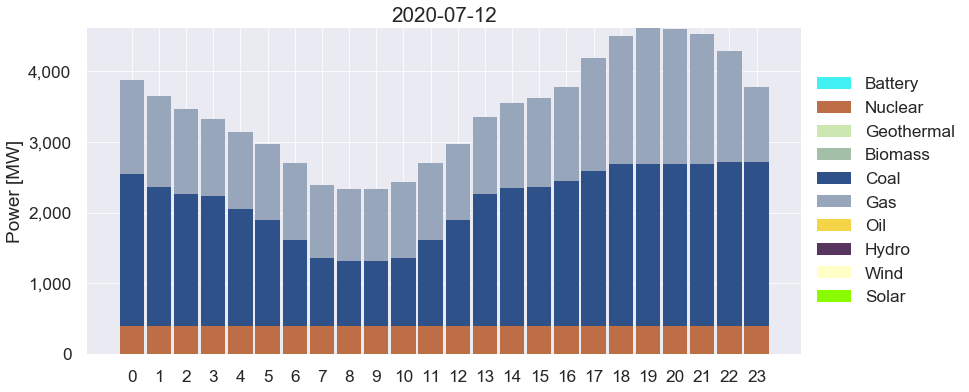

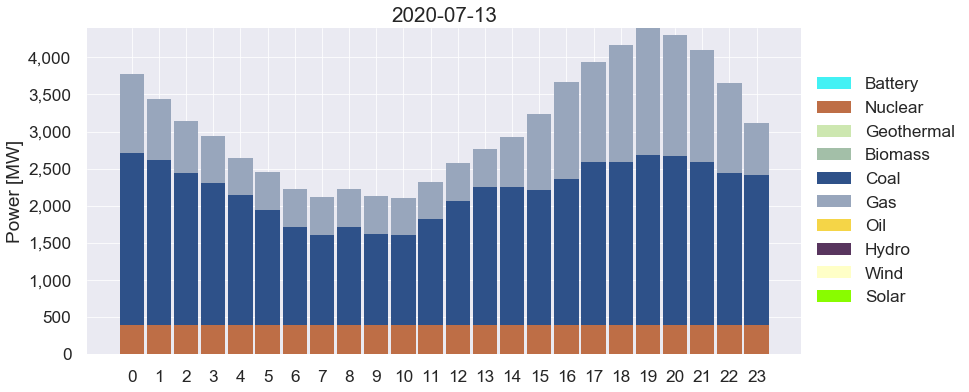

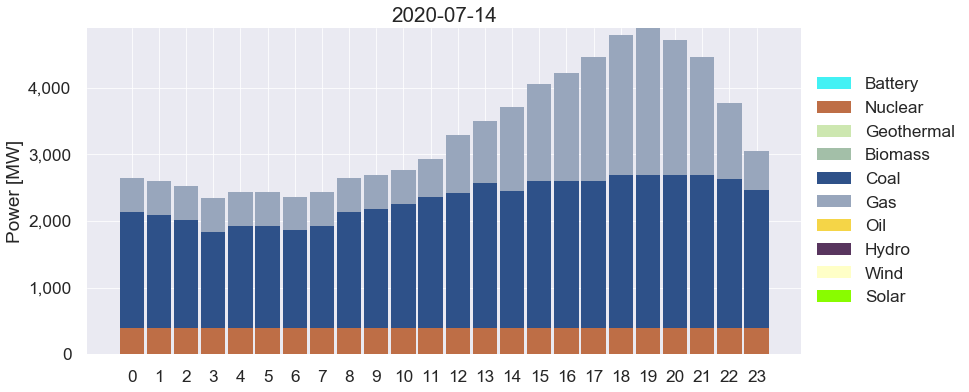

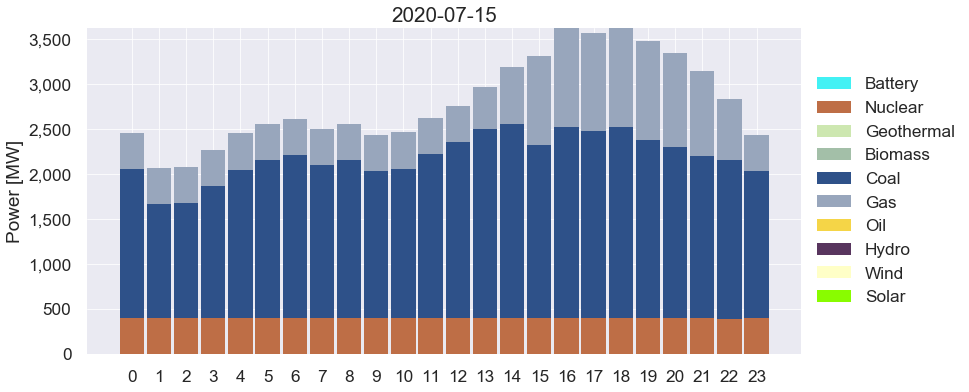

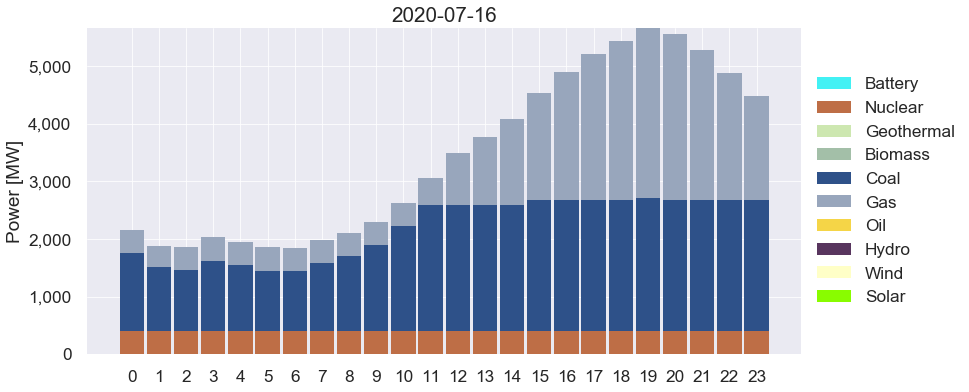

In [45]:
DATE = thermal_detail['Date'].unique()[0]
SAMPLE_DAY = thermal_detail.loc[thermal_detail['Date'] == DATE]

for date in thermal_detail['Date'].unique():
    SAMPLE_DAY = thermal_detail.loc[thermal_detail['Date'] == date]
    generate_stackedbar_chart(SAMPLE_DAY, title=date)